In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

# Problem

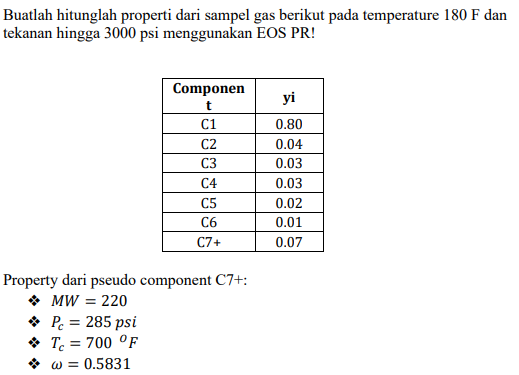

# Objective: Determine natural gas property Z, Bg, Gas Viscosity, Gas Expansion Factor, Density, Specific Volume Gas

# Composition Dataset

In [300]:
dc=pd.read_csv('dataset\Data Komposisi 2.csv')
dc

,Component,yi,Tci,Pci,wi
0,C1,0.80,343.33,666.4,0.0104
1,C2,0.04,549.92,706.5,0.0989
2,C3,0.03,666.06,616.4,0.1522
3,C4,0.03,765.62,527.9,0.1852
4,C5,0.02,845.80,488.6,0.2280
5,C6,0.01,923.00,453.0,0.2500
6,C7+,0.07,1160.00,285.0,0.5200


In [301]:
global Tres, Pres, Tres_Rank, R
Tres=180 # Fahrenheit
Pres=3000 #psia
Tres_Rank=Tres+460.67 #Rankine
#gas constant
R=10.732 #ft3 psia/Rankine lbmol

In [302]:
#Generate Pressure Data
P=[float (x) for x in np.linspace(50, Pres, num=100)] #in psia

#Generate Property data for isotermal condition
#T=[float (x) for x in np.linspace(10, Tres, num=100)] #in fahrenheit
PVT_Calc=pd.DataFrame({'Pressure':P}) #,'Temperature':T})
PVT_Calc.head()

,Pressure
0,50.000000
1,79.797980
2,109.595960
3,139.393939
4,169.191919


## Determine Z factor

### Peng Robinson Equation of State

#### Calculate K

In [303]:
#calculate k
dc['k']=0.37464+1.54226*dc['wi']-0.26992*dc['wi']**2

#### Calculate alpha

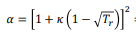

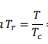

In [304]:
#calculate Tr
dc['Tr']=Tres_Rank/dc['Tci']

In [305]:
#calculate alpha
dc['alpha']=(1+dc['k']*(1-dc['Tr']**0.5))**2

#### Calculate alphac

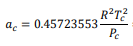

In [306]:
#calculate a
dc['a']=0.45723553*((R**2) * (dc['Tci']**2)/dc['Pci'])

#### Calculate b

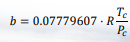

In [307]:
#calculate b
dc['b']=0.07779607 *(R * (dc['Tci'])/dc['Pci'])

#### Calculate (aalpha)m  and bm

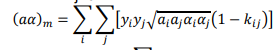

asumsi kij=0

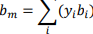

In [308]:
#function to calculate aalpha and bm
def aalphabm(dc):
    sum_aalpha=0
    sum_bm=0
    for i in range(0, len(dc)):
        for j in range(0, len(dc)):
            sum_aalpha+=dc['yi'][i]*dc['yi'][j]*( ( dc['a'][i] * dc['a'][j]) * ( dc['alpha'][i] * dc['alpha'][j] ) )**0.5
        sum_bm+=dc['yi'][i]*dc['b'][i]
    return(sum_aalpha, sum_bm)

In [309]:
#calculate (a alpha)
sum_aalpha=0
sum_bm=0
for i in range(0, len(dc)):
    for j in range(0, len(dc)):
        sum_aalpha+=dc['yi'][i]*dc['yi'][j]*( ( dc['a'][i] * dc['a'][j]) * ( dc['alpha'][i] * dc['alpha'][j] ) )**0.5
    sum_bm+=dc['yi'][i]*dc['b'][i]
print(sum_aalpha) # for T reservoir and Preservoir Condition
print(sum_bm)

19570.47883776151
0.7172948429995332


#### Calculate A and B

#for temperature variation loop
#loop to calculate aalpham and bm for each Pressure and Temperature
aalpham=[]
bm=[]
for i in range(0, len(PVT_Calc)):
    #calculate k
    dc['k']=0.37464+1.54226*dc['wi']-0.26992*dc['wi']**2
    #calculate Tr
    dc['Tr']=(PVT_Calc['Temperature'][i]+460.67)/dc['Tci']
    #calculate alpha
    dc['alpha']=(1+dc['k']*(1-dc['Tr']**0.5))**2
    #calculate a
    dc['a']=0.45723553*((R**2) * (dc['Tci']**2)/dc['Pci'])
    #calculate b
    dc['b']=0.07779607 *(R * (dc['Tci'])/dc['Pci'])
    #calculate aalpham and bm
    alpham, bmi=aalphabm(dc)
    aalpham.append(alpham)
    bm.append(bmi)

#for temperature variation loop
#input aalpham and bm into PVT_Calc dataframe
PVT_Calc['aalpham']=aalpham
PVT_Calc['bm']=bm

In [310]:
#input aalpham and bm into PVT_Calc dataframe
PVT_Calc['aalpham']=sum_aalpha
PVT_Calc['bm']=sum_bm

In [311]:
PVT_Calc.tail()

,Pressure,aalpham,bm
95,2880.808081,19570.478838,0.717295
96,2910.606061,19570.478838,0.717295
97,2940.404040,19570.478838,0.717295
98,2970.202020,19570.478838,0.717295
99,3000.000000,19570.478838,0.717295


In [312]:
PVT_Calc.head()

,Pressure,aalpham,bm
0,50.000000,19570.478838,0.717295
1,79.797980,19570.478838,0.717295
2,109.595960,19570.478838,0.717295
3,139.393939,19570.478838,0.717295
4,169.191919,19570.478838,0.717295


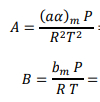

#for temperature variation loop
#function to calculate A value
def calc_A(d):
    return( (d['aalpham']*d['Pressure']) / ((R**2) * ((d['Temperature']+460.67)**2 ) ) )
#function to calculate B value
def calc_B(d):
    return( (d['bm']*d['Pressure']) / ((R) * (d['Temperature']+460.67) ) )

In [313]:

#function to calculate A value
def calc_A(d):
    return( (d['aalpham']*d['Pressure']) / ((R**2) * ((Tres_Rank)**2 ) ) )
#function to calculate B value
def calc_B(d):
    return( (d['bm']*d['Pressure']) / ((R) * (Tres_Rank) ) )

In [314]:
#calculate A and B for each Pressure
PVT_Calc['A']=PVT_Calc.apply(lambda x: calc_A(x), axis=1)
PVT_Calc['B']=PVT_Calc.apply(lambda x: calc_B(x), axis=1)

In [315]:
PVT_Calc.head()

,Pressure,aalpham,bm,A,B
0,50.000000,19570.478838,0.717295,0.020699,0.005216
1,79.797980,19570.478838,0.717295,0.033034,0.008325
2,109.595960,19570.478838,0.717295,0.045370,0.011433
3,139.393939,19570.478838,0.717295,0.057705,0.014542
4,169.191919,19570.478838,0.717295,0.070041,0.017651


In [316]:
PVT_Calc.tail()

,Pressure,aalpham,bm,A,B
95,2880.808081,19570.478838,0.717295,1.192575,0.300536
96,2910.606061,19570.478838,0.717295,1.204910,0.303645
97,2940.404040,19570.478838,0.717295,1.217246,0.306754
98,2970.202020,19570.478838,0.717295,1.229582,0.309862
99,3000.000000,19570.478838,0.717295,1.241917,0.312971


#### find z with newton rhapson method

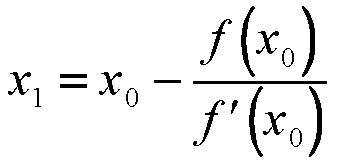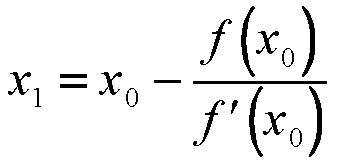

In [317]:
#calculate zfunct
def fungsiz(a,b,z):
    return(z**3-(1-b)*z**2+(a-3*b**2-2*b)*z-(a*b-b**2-b**3))
def dfungsiz(a,b,z):
    return(3*z**2-2*(1-b)*z+(a-3*b**2-2*b))

In [318]:
def hitungz(d):
    e=1
    zbaru=0
    zlama=1
    a=d['A']
    b=d['B']
    while e>0.0000001:
        func=fungsiz(a,b,zlama)
        dfunc=dfungsiz(a,b,zlama)
        zbaru=zlama-func/dfunc
        e=abs(zbaru-zlama)
        zlama=zbaru
    nilaiz=zlama
    return(nilaiz)

In [319]:
#calculate Z value
PVT_Calc['Z_PR']=PVT_Calc.apply(lambda x: hitungz(x), axis=1)

In [320]:
PVT_Calc.head()

,Pressure,aalpham,bm,A,B,Z_PR
0,50.000000,19570.478838,0.717295,0.020699,0.005216,0.984522
1,79.797980,19570.478838,0.717295,0.033034,0.008325,0.975305
2,109.595960,19570.478838,0.717295,0.045370,0.011433,0.966094
3,139.393939,19570.478838,0.717295,0.057705,0.014542,0.956893
4,169.191919,19570.478838,0.717295,0.070041,0.017651,0.947703


In [321]:
PVT_Calc.tail()

,Pressure,aalpham,bm,A,B,Z_PR
95,2880.808081,19570.478838,0.717295,1.192575,0.300536,0.719439
96,2910.606061,19570.478838,0.717295,1.204910,0.303645,0.722595
97,2940.404040,19570.478838,0.717295,1.217246,0.306754,0.725776
98,2970.202020,19570.478838,0.717295,1.229582,0.309862,0.728978
99,3000.000000,19570.478838,0.717295,1.241917,0.312971,0.732202


### Beggs Brill Equation

In [322]:
#data komposisi
dc

,Component,yi,Tci,Pci,wi,k,Tr,alpha,a,b
0,C1,0.80,343.33,666.4,0.0104,0.390650,1.866047,0.734464,9315.149236,0.430145
1,C2,0.04,549.92,706.5,0.0989,0.524529,1.165024,0.918477,22541.777658,0.649869
2,C3,0.03,666.06,616.4,0.1522,0.603119,0.961880,1.023349,37902.283386,0.902171
3,C4,0.03,765.62,527.9,0.1852,0.651009,0.836799,1.114053,58475.800535,1.210877
4,C5,0.02,845.80,488.6,0.2280,0.712244,0.757472,1.193245,77105.116442,1.445282
5,C6,0.01,923.00,453.0,0.2500,0.743335,0.694117,1.263455,99039.057422,1.701147
6,C7+,0.07,1160.00,285.0,0.5200,1.103629,0.552302,1.647231,248640.812800,3.398220


#### Calculate SG

In [323]:
#Molecular weight for each component
Mw=[16.04, 30.1, 44.1, 58.1, 72.2, 86.2, 220]
Mw

[16.04, 30.1, 44.1, 58.1, 72.2, 86.2, 220]

In [324]:
#input Molecullar weight to dc dataframe
dc['Mw']=Mw

In [325]:
dc

,Component,yi,Tci,Pci,wi,k,Tr,alpha,a,b,Mw
0,C1,0.80,343.33,666.4,0.0104,0.390650,1.866047,0.734464,9315.149236,0.430145,16.04
1,C2,0.04,549.92,706.5,0.0989,0.524529,1.165024,0.918477,22541.777658,0.649869,30.10
2,C3,0.03,666.06,616.4,0.1522,0.603119,0.961880,1.023349,37902.283386,0.902171,44.10
3,C4,0.03,765.62,527.9,0.1852,0.651009,0.836799,1.114053,58475.800535,1.210877,58.10
4,C5,0.02,845.80,488.6,0.2280,0.712244,0.757472,1.193245,77105.116442,1.445282,72.20
5,C6,0.01,923.00,453.0,0.2500,0.743335,0.694117,1.263455,99039.057422,1.701147,86.20
6,C7+,0.07,1160.00,285.0,0.5200,1.103629,0.552302,1.647231,248640.812800,3.398220,220.00


In [326]:
#calculate yi*Mw
dc['Mw*yi']=dc['Mw']*dc['yi']
dc

,Component,yi,Tci,Pci,wi,k,Tr,alpha,a,b,Mw,Mw*yi
0,C1,0.80,343.33,666.4,0.0104,0.390650,1.866047,0.734464,9315.149236,0.430145,16.04,12.832
1,C2,0.04,549.92,706.5,0.0989,0.524529,1.165024,0.918477,22541.777658,0.649869,30.10,1.204
2,C3,0.03,666.06,616.4,0.1522,0.603119,0.961880,1.023349,37902.283386,0.902171,44.10,1.323
3,C4,0.03,765.62,527.9,0.1852,0.651009,0.836799,1.114053,58475.800535,1.210877,58.10,1.743
4,C5,0.02,845.80,488.6,0.2280,0.712244,0.757472,1.193245,77105.116442,1.445282,72.20,1.444
5,C6,0.01,923.00,453.0,0.2500,0.743335,0.694117,1.263455,99039.057422,1.701147,86.20,0.862
6,C7+,0.07,1160.00,285.0,0.5200,1.103629,0.552302,1.647231,248640.812800,3.398220,220.00,15.400


In [327]:
#sum of Mw*yi
sum(dc['Mw*yi'])

34.80800000000001

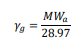

In [328]:
#calculate SG
#28.97 Molecllar weight udara
global SG
SG=sum(dc['Mw*yi'])/28.97
SG

1.2015188125647225

#### Ppc dan Tpc

Jika diketahui data komposisinya

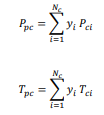

In [329]:
dc['Pciyi']=dc.Pci*dc.yi
dc['Tciyi']=dc.Tci*dc.yi
dc

,Component,yi,Tci,Pci,wi,k,Tr,alpha,a,b,Mw,Mw*yi,Pciyi,Tciyi
0,C1,0.80,343.33,666.4,0.0104,0.390650,1.866047,0.734464,9315.149236,0.430145,16.04,12.832,533.120,274.6640
1,C2,0.04,549.92,706.5,0.0989,0.524529,1.165024,0.918477,22541.777658,0.649869,30.10,1.204,28.260,21.9968
2,C3,0.03,666.06,616.4,0.1522,0.603119,0.961880,1.023349,37902.283386,0.902171,44.10,1.323,18.492,19.9818
3,C4,0.03,765.62,527.9,0.1852,0.651009,0.836799,1.114053,58475.800535,1.210877,58.10,1.743,15.837,22.9686
4,C5,0.02,845.80,488.6,0.2280,0.712244,0.757472,1.193245,77105.116442,1.445282,72.20,1.444,9.772,16.9160
5,C6,0.01,923.00,453.0,0.2500,0.743335,0.694117,1.263455,99039.057422,1.701147,86.20,0.862,4.530,9.2300
6,C7+,0.07,1160.00,285.0,0.5200,1.103629,0.552302,1.647231,248640.812800,3.398220,220.00,15.400,19.950,81.2000


In [330]:
Ppc=sum(dc.Pciyi)
Tpc=sum(dc.Tciyi)
print(Ppc)
print(Tpc)

629.961
446.9572


jika tidak diketahui data komposisinya

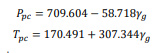

#### Tpr, A, C, E, F, D

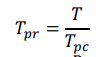

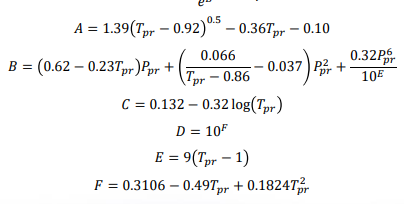

In [331]:
#property dihitung dalam kondisi isotermal
#Tpr
Tpr=Tres_Rank/Tpc
#A
A=1.39*(Tpr-0.92)**0.5-0.36*Tpr-0.1
#C
C=0.132-0.32*math.log(Tpr,10)
#E
E=9*(Tpr-1)
#F
F=0.3106-0.49*Tpr+0.1824*Tpr**2
#D
D=10**F

In [332]:
A, C, E, F, D

(0.37994003158183975,
 0.08196209583475167,
 3.900631201376778,
 -0.017000359780464935,
 0.9616114817602128)

#### Calculate Ppr B and Z

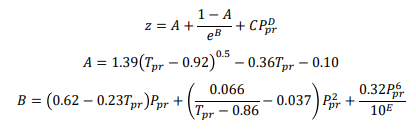

In [333]:
#Ppr
PVT_Calc['Ppr_Beggs']=PVT_Calc['Pressure']/Ppc

In [334]:
#B
PVT_Calc['B_Beggs']=(0.62-0.23*Tpr)*PVT_Calc['Ppr_Beggs']+((0.066)/(Tpr-0.86)-0.037)*PVT_Calc['Ppr_Beggs']**2+(0.32*PVT_Calc['Ppr_Beggs']**6)/10**E

In [335]:
math.exp(5)

148.4131591025766

In [336]:
#Z
PVT_Calc['Z_Beggs']=A+((1-A)/np.exp(PVT_Calc['B_Beggs']))+C*PVT_Calc['Ppr_Beggs']**D

In [337]:
PVT_Calc.head()

,Pressure,aalpham,bm,A,B,Z_PR,Ppr_Beggs,B_Beggs,Z_Beggs
0,50.000000,19570.478838,0.717295,0.020699,0.005216,0.984522,0.079370,0.023534,0.992747
1,79.797980,19570.478838,0.717295,0.033034,0.008325,0.975305,0.126671,0.038028,0.988102
2,109.595960,19570.478838,0.717295,0.045370,0.011433,0.966094,0.173973,0.052871,0.983318
3,139.393939,19570.478838,0.717295,0.057705,0.014542,0.956893,0.221274,0.068064,0.978418
4,169.191919,19570.478838,0.717295,0.070041,0.017651,0.947703,0.268575,0.083606,0.973420


In [338]:
PVT_Calc.tail()

,Pressure,aalpham,bm,A,B,Z_PR,Ppr_Beggs,B_Beggs,Z_Beggs
95,2880.808081,19570.478838,0.717295,1.192575,0.300536,0.719439,4.572994,3.328808,0.755726
96,2910.606061,19570.478838,0.717295,1.204910,0.303645,0.722595,4.620296,3.399934,0.757716
97,2940.404040,19570.478838,0.717295,1.217246,0.306754,0.725776,4.667597,3.472640,0.759780
98,2970.202020,19570.478838,0.717295,1.229582,0.309862,0.728978,4.714898,3.546978,0.761914
99,3000.000000,19570.478838,0.717295,1.241917,0.312971,0.732202,4.762200,3.622999,0.764118


## Determine Gas Formation Volume Factor(Bg)

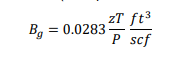

- z = deviation factor
- T= Temperature (Rankine)
- P= Pressure(psia)

In [339]:
def bg(z,T,P):
    bgi=0.0283*z*T/P
    return(bgi)#ft3/scf

In [340]:
PVT_Calc['Bg']=PVT_Calc.apply(lambda x: bg(x['Z_PR'], Tres_Rank, x['Pressure']), axis=1)

In [341]:
PVT_Calc.head()

,Pressure,aalpham,bm,A,B,Z_PR,Ppr_Beggs,B_Beggs,Z_Beggs,Bg
0,50.000000,19570.478838,0.717295,0.020699,0.005216,0.984522,0.079370,0.023534,0.992747,0.357007
1,79.797980,19570.478838,0.717295,0.033034,0.008325,0.975305,0.126671,0.038028,0.988102,0.221600
2,109.595960,19570.478838,0.717295,0.045370,0.011433,0.966094,0.173973,0.052871,0.983318,0.159825
3,139.393939,19570.478838,0.717295,0.057705,0.014542,0.956893,0.221274,0.068064,0.978418,0.124463
4,169.191919,19570.478838,0.717295,0.070041,0.017651,0.947703,0.268575,0.083606,0.973420,0.101558


## Density Gas

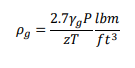

- P = Pressure in psia
- T = Temperature in Rankine

In [342]:
def gas_dens(SG, P, z, T):
    dens_gas=2.7*SG*P/(z*T)
    return(dens_gas) #in lbm/ft3

In [343]:
PVT_Calc['gas_dens']=PVT_Calc.apply(lambda x:gas_dens(SG, x['Pressure'], x['Z_PR'], Tres_Rank), axis=1)
PVT_Calc.tail()

,Pressure,aalpham,bm,A,B,Z_PR,Ppr_Beggs,B_Beggs,Z_Beggs,Bg,gas_dens
95,2880.808081,19570.478838,0.717295,1.192575,0.300536,0.719439,4.572994,3.328808,0.755726,0.004528,20.275915
96,2910.606061,19570.478838,0.717295,1.204910,0.303645,0.722595,4.620296,3.399934,0.757716,0.004501,20.396151
97,2940.404040,19570.478838,0.717295,1.217246,0.306754,0.725776,4.667597,3.472640,0.759780,0.004475,20.514675
98,2970.202020,19570.478838,0.717295,1.229582,0.309862,0.728978,4.714898,3.546978,0.761914,0.004450,20.631530
99,3000.000000,19570.478838,0.717295,1.241917,0.312971,0.732202,4.762200,3.622999,0.764118,0.004425,20.746756


## Gas Viscosity

**viskositas gas dapat dihitung sebagai berikut**

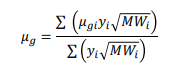

**atau dapat menggunakan korelasi Lee Gonzals Eakin**

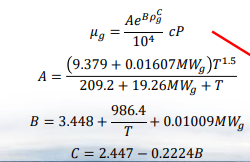

T in Rankine

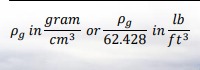

In [344]:
#A
A=((9.379+0.01607*sum(dc['Mw*yi']))*Tres_Rank**1.5)/(209.2+19.26*sum(dc['Mw*yi'])+Tres_Rank)
#B
B=3.448+986.4/Tres_Rank+0.01009*sum(dc['Mw*yi'])
#C
C=2.447-0.2224*B

In [345]:
def gas_vis(A, B, dens_gas, C):
    visc_gas=(A*math.exp(B*(dens_gas/62.428)**C))/10**4
    return(visc_gas) #in Centipoise

In [346]:
#gas viscosity
PVT_Calc['gas_visc']=PVT_Calc.apply(lambda x:gas_vis(A, B, x['gas_dens'],C), axis=1)
PVT_Calc.tail()

,Pressure,aalpham,bm,A,B,Z_PR,Ppr_Beggs,B_Beggs,Z_Beggs,Bg,gas_dens,gas_visc
95,2880.808081,19570.478838,0.717295,1.192575,0.300536,0.719439,4.572994,3.328808,0.755726,0.004528,20.275915,0.038701
96,2910.606061,19570.478838,0.717295,1.204910,0.303645,0.722595,4.620296,3.399934,0.757716,0.004501,20.396151,0.039077
97,2940.404040,19570.478838,0.717295,1.217246,0.306754,0.725776,4.667597,3.472640,0.759780,0.004475,20.514675,0.039452
98,2970.202020,19570.478838,0.717295,1.229582,0.309862,0.728978,4.714898,3.546978,0.761914,0.004450,20.631530,0.039826
99,3000.000000,19570.478838,0.717295,1.241917,0.312971,0.732202,4.762200,3.622999,0.764118,0.004425,20.746756,0.040199


## Specific Volume

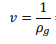

dens_gas= densitas gas in lbm/ft3

In [347]:
#specific Volume
PVT_Calc['spec_vol']=1/PVT_Calc['gas_dens']
PVT_Calc.tail()

,Pressure,aalpham,bm,A,B,Z_PR,Ppr_Beggs,B_Beggs,Z_Beggs,Bg,gas_dens,gas_visc,spec_vol
95,2880.808081,19570.478838,0.717295,1.192575,0.300536,0.719439,4.572994,3.328808,0.755726,0.004528,20.275915,0.038701,0.049320
96,2910.606061,19570.478838,0.717295,1.204910,0.303645,0.722595,4.620296,3.399934,0.757716,0.004501,20.396151,0.039077,0.049029
97,2940.404040,19570.478838,0.717295,1.217246,0.306754,0.725776,4.667597,3.472640,0.759780,0.004475,20.514675,0.039452,0.048746
98,2970.202020,19570.478838,0.717295,1.229582,0.309862,0.728978,4.714898,3.546978,0.761914,0.004450,20.631530,0.039826,0.048470
99,3000.000000,19570.478838,0.717295,1.241917,0.312971,0.732202,4.762200,3.622999,0.764118,0.004425,20.746756,0.040199,0.048200


## Gas Expansion Factor

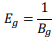

Bg in ft3/scf

In [348]:
#gas expansion Factor
PVT_Calc['Eg']=1/PVT_Calc['Bg']
PVT_Calc.tail()

,Pressure,aalpham,bm,A,B,Z_PR,Ppr_Beggs,B_Beggs,Z_Beggs,Bg,gas_dens,gas_visc,spec_vol,Eg
95,2880.808081,19570.478838,0.717295,1.192575,0.300536,0.719439,4.572994,3.328808,0.755726,0.004528,20.275915,0.038701,0.049320,220.851165
96,2910.606061,19570.478838,0.717295,1.204910,0.303645,0.722595,4.620296,3.399934,0.757716,0.004501,20.396151,0.039077,0.049029,222.160809
97,2940.404040,19570.478838,0.717295,1.217246,0.306754,0.725776,4.667597,3.472640,0.759780,0.004475,20.514675,0.039452,0.048746,223.451806
98,2970.202020,19570.478838,0.717295,1.229582,0.309862,0.728978,4.714898,3.546978,0.761914,0.004450,20.631530,0.039826,0.048470,224.724619
99,3000.000000,19570.478838,0.717295,1.241917,0.312971,0.732202,4.762200,3.622999,0.764118,0.004425,20.746756,0.040199,0.048200,225.979699


# Export Gas Property into CSV

In [349]:
#export result into CSV for gas property only
final_PVT=PVT_Calc['Pressure Z_PR Z_Beggs Bg gas_dens gas_visc spec_vol Eg'.split()]
final_PVT.tail()

,Pressure,Z_PR,Z_Beggs,Bg,gas_dens,gas_visc,spec_vol,Eg
95,2880.808081,0.719439,0.755726,0.004528,20.275915,0.038701,0.049320,220.851165
96,2910.606061,0.722595,0.757716,0.004501,20.396151,0.039077,0.049029,222.160809
97,2940.404040,0.725776,0.759780,0.004475,20.514675,0.039452,0.048746,223.451806
98,2970.202020,0.728978,0.761914,0.004450,20.631530,0.039826,0.048470,224.724619
99,3000.000000,0.732202,0.764118,0.004425,20.746756,0.040199,0.048200,225.979699


In [350]:
final_PVT.to_csv('Output Result\PVT Property Result.csv', index=False)

# Visualize Gas Property Result

## Z Factor

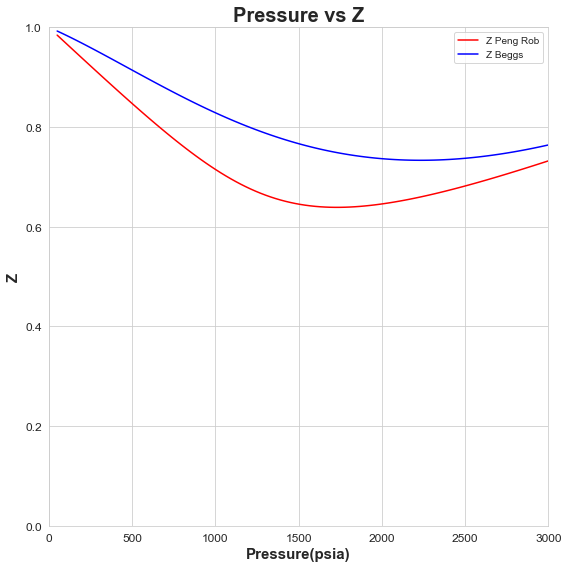

In [293]:
fig, axes=plt.subplots(1,1,figsize=(8,8))
sns.set_style('whitegrid')
sns.lineplot(x='Pressure', y='Z_PR', data=final_PVT, color='red', label='Z Peng Rob', markers='<')
sns.lineplot(x='Pressure', y='Z_Beggs', data=final_PVT, color='blue', label='Z Beggs', markers=True)
axes.set_ylim(0,1)
axes.set_xlim(0,final_PVT['Pressure'].max())
axes.tick_params(axis='x', labelsize=12)
axes.tick_params(axis='y', labelsize=12)
axes.set_title('Pressure vs Z', size=20, weight='bold')
axes.set_xlabel('Pressure(psia)', weight='bold', size=15)
axes.set_ylabel('Z', weight='bold', size=15)
plt.tight_layout()
fig.show()
fig.savefig('Graph/PvsZ.jpg')

## Bg

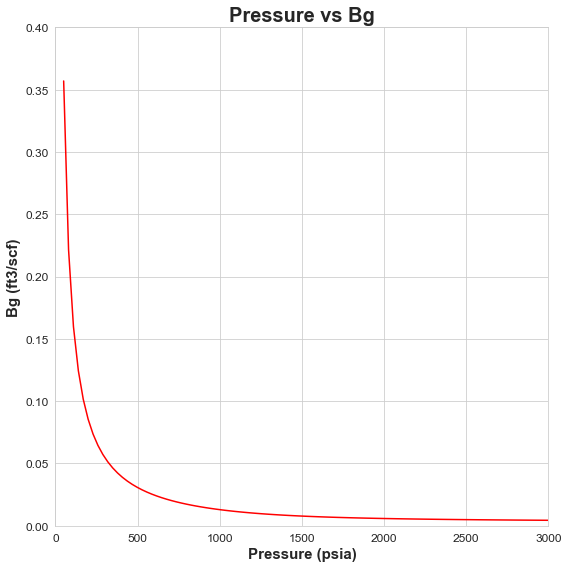

In [294]:
fig, axes=plt.subplots(1,1,figsize=(8,8))
sns.set_style('whitegrid')
sns.lineplot(x='Pressure', y='Bg', data=final_PVT, color='red', markers=True)
axes.set_ylim(0,0.4)
axes.set_xlim(0,final_PVT['Pressure'].max())
axes.tick_params(axis='x', labelsize=12)
axes.tick_params(axis='y', labelsize=12)
axes.set_title('Pressure vs Bg', size=20, weight='bold')
axes.set_xlabel('Pressure (psia)', weight='bold', size=15)
axes.set_ylabel('Bg (ft3/scf)', weight='bold', size=15)
plt.tight_layout()
fig.show()
fig.savefig('Graph/PvsBg.jpg')

## Gas Density

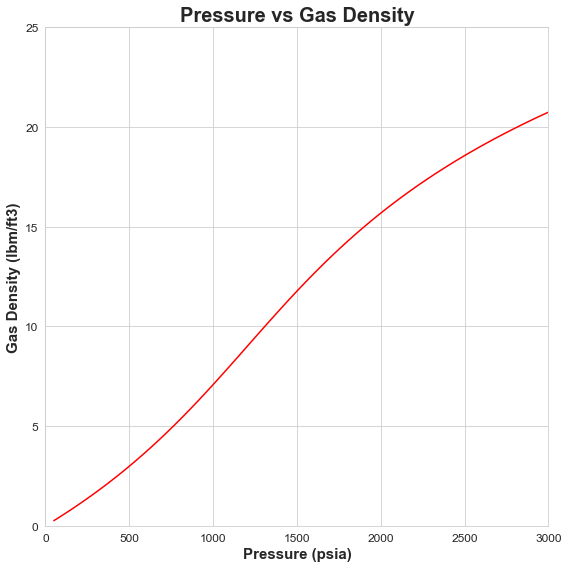

In [295]:
fig, axes=plt.subplots(1,1,figsize=(8,8))
sns.set_style('whitegrid')
sns.lineplot(x='Pressure', y='gas_dens', data=final_PVT, color='red', markers=True)
axes.set_ylim(0,25)
axes.set_xlim(0,final_PVT['Pressure'].max())
axes.tick_params(axis='x', labelsize=12)
axes.tick_params(axis='y', labelsize=12)
axes.set_title('Pressure vs Gas Density', size=20, weight='bold')
axes.set_xlabel('Pressure (psia)', weight='bold', size=15)
axes.set_ylabel('Gas Density (lbm/ft3)', weight='bold', size=15)
plt.tight_layout()
fig.show()
fig.savefig('Graph/PvsGasDensity.jpg')

## Gas Viscosity

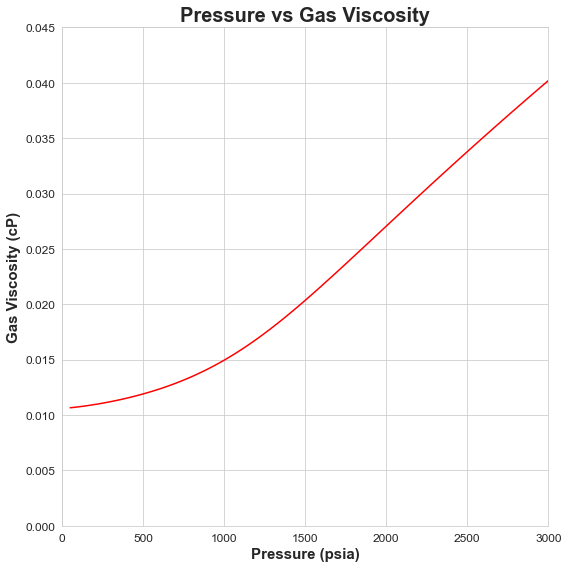

In [296]:
fig, axes=plt.subplots(1,1,figsize=(8,8))
sns.set_style('whitegrid')
sns.lineplot(x='Pressure', y='gas_visc', data=final_PVT, color='red', markers=True)
axes.set_ylim(0,0.045)
axes.set_xlim(0,final_PVT['Pressure'].max())
axes.tick_params(axis='x', labelsize=12)
axes.tick_params(axis='y', labelsize=12)
axes.set_title('Pressure vs Gas Viscosity', size=20, weight='bold')
axes.set_xlabel('Pressure (psia)', weight='bold', size=15)
axes.set_ylabel('Gas Viscosity (cP)', weight='bold', size=15)
plt.tight_layout()
fig.show()
fig.savefig('Graph/PvsGasViscosity.jpg')

## Specific Volume

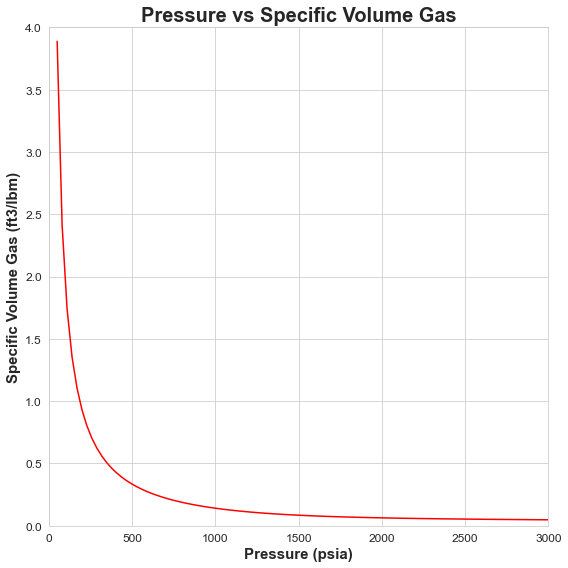

In [297]:
fig, axes=plt.subplots(1,1,figsize=(8,8))
sns.set_style('whitegrid')
sns.lineplot(x='Pressure', y='spec_vol', data=final_PVT, color='red', markers=True)
axes.set_ylim(0,4)
axes.set_xlim(0,final_PVT['Pressure'].max())
axes.tick_params(axis='x', labelsize=12)
axes.tick_params(axis='y', labelsize=12)
axes.set_title('Pressure vs Specific Volume Gas', size=20, weight='bold')
axes.set_xlabel('Pressure (psia)', weight='bold', size=15)
axes.set_ylabel('Specific Volume Gas (ft3/lbm)', weight='bold', size=15)
plt.tight_layout()
fig.show()
fig.savefig('Graph/PvsSpecVolum.jpg')

## Eg

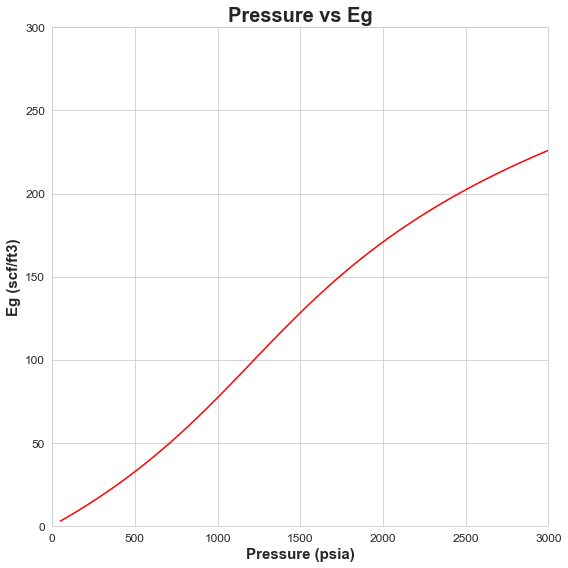

In [298]:
fig, axes=plt.subplots(1,1,figsize=(8,8))
sns.set_style('whitegrid')
sns.lineplot(x='Pressure', y='Eg', data=final_PVT, color='red', markers=True)
axes.set_ylim(0,300)
axes.set_xlim(0,final_PVT['Pressure'].max())
axes.tick_params(axis='x', labelsize=12)
axes.tick_params(axis='y', labelsize=12)
axes.set_title('Pressure vs Eg', size=20, weight='bold')
axes.set_xlabel('Pressure (psia)', weight='bold', size=15)
axes.set_ylabel('Eg (scf/ft3)', weight='bold', size=15)
plt.tight_layout()
fig.show()
fig.savefig('Graph/PvsEg.jpg')